In [1]:
import numpyro
from numpyro.infer import MCMC, NUTS, init_to_median
import numpyro.distributions as dist
from numpyro.infer.util import log_likelihood
import jax
import jax.numpy as jnp
from jax import random
import arviz as az
import pandas as pd
import numpy as np
import xarray as xr

In [2]:
numpyro.util.enable_x64(True)

In [12]:
# Import and prepare data
data = pd.read_csv('../datasets/model_dataset.csv')
dataset = data.query('year >= 1995').copy()
# dataset = data.copy()
dataset["exp"] = (dataset["exp"] - dataset["exp"].mean()) / dataset["exp"].std()
dataset["age"] = (dataset["age"] - dataset["age"].mean()) / dataset["age"].std()
dataset["tenure"] = (dataset["tenure"] - dataset["tenure"].mean()) / dataset["tenure"].std()

In [13]:
# Prepare data for running the model
X = dataset[["exp","sex","elementary_edu", "highschool_edu", "postsec_edu",
             "undergrad_edu", "graduate_edu", "age", "tenure", "union",
             "part_time", "public_sector", "public_sector", "self_emp",
             "grad_highschool_refyear", "grad_college_refyear", "grad_univ_refyear"]].values
y = dataset["salary"].values
ind = pd.factorize(dataset["industry"])[0]

In [21]:
def model(X, y):
    # Priors
    avg_salary = numpyro.sample("avg_salary", dist.Normal(10, 10))
    beta_exp = numpyro.sample("beta_exp", dist.Normal(0, 10))
    beta_sex = numpyro.sample("beta_sex", dist.Normal(0, 10))
    beta_elementary_edu = numpyro.sample("beta_elementary_edu", dist.Normal(0, 10))
    beta_highschool_edu = numpyro.sample("beta_highschool_edu", dist.Normal(0, 10))
    beta_postsec_edu = numpyro.sample("beta_postsec_edu", dist.Normal(0, 10))
    beta_undergrad_edu = numpyro.sample("beta_undergrad_edu", dist.Normal(0, 10))
    beta_graduate_edu = numpyro.sample("beta_graduate_edu", dist.Normal(0, 10))
    beta_age = numpyro.sample("beta_age", dist.Normal(0, 10))
    beta_tenure = numpyro.sample("beta_tenure", dist.Normal(0, 10))
    beta_union = numpyro.sample("beta_union", dist.Normal(0, 10))
    beta_part_time = numpyro.sample("beta_part_time", dist.Normal(0, 10))
    beta_public_sector = numpyro.sample("beta_public_sector", dist.Normal(0, 10))
    beta_self_emp = numpyro.sample("beta_self_emp", dist.Normal(0, 10))
    beta_grad_highschool_refyear = numpyro.sample("beta_grad_highschool_refyear", dist.Normal(0, 10))
    beta_grad_college_refyear = numpyro.sample("beta_grad_college_refyear", dist.Normal(0, 10))
    beta_grad_univ_refyear = numpyro.sample("beta_grad_univ_refyear", dist.Normal(0, 10))
    shape = numpyro.sample("shape", dist.Uniform(0, 10))


    # Expected value
    mu = (avg_salary + beta_exp * X[:,0] + beta_sex * X[:,1] + beta_elementary_edu * X[:,2]
         + beta_highschool_edu * X[:,3] + beta_postsec_edu * X[:,4] + beta_undergrad_edu * X[:,5]
            + beta_graduate_edu * X[:,6] + beta_age * X[:,7] + beta_tenure * X[:,8] + beta_union * X[:,9]
            + beta_part_time * X[:,10] + beta_public_sector * X[:,11] + beta_self_emp * X[:,12]
            + beta_grad_highschool_refyear * X[:,13] + beta_grad_college_refyear * X[:,14]
            + beta_grad_univ_refyear * X[:,15])
    mu = jnp.exp(mu)
    rate = shape/mu

    # Likelihood
    numpyro.sample("salary_hat", dist.Gamma(concentration=shape, rate=rate), obs=y)

def hierarchical(X, y):
    # Hyperpriors
    mu_avg_salary = numpyro.sample("mu_avg_salary", dist.Normal(10, 3))
    sigma_avg_salary = numpyro.sample("sigma_avg_salary", dist.HalfNormal(3))
    mu_beta_exp = numpyro.sample("mu_beta_exp", dist.Normal(0, 3))
    sigma_beta_exp = numpyro.sample("sigma_beta_exp", dist.HalfNormal(3))
    mu_beta_sex = numpyro.sample("mu_beta_sex", dist.Normal(0, 3))
    sigma_beta_sex = numpyro.sample("sigma_beta_sex", dist.HalfNormal(3))
    mu_beta_elementary_edu = numpyro.sample("mu_beta_elementary_edu", dist.Normal(0, 3))
    sigma_beta_elementary_edu = numpyro.sample("sigma_beta_elementary_edu", dist.HalfNormal(3))
    mu_beta_highschool_edu = numpyro.sample("mu_beta_highschool_edu", dist.Normal(0, 3))
    sigma_beta_highschool_edu = numpyro.sample("sigma_beta_highschool_edu", dist.HalfNormal(3))
    mu_beta_postsec_edu = numpyro.sample("mu_beta_postsec_edu", dist.Normal(0, 3))
    sigma_beta_postsec_edu = numpyro.sample("sigma_beta_postsec_edu", dist.HalfNormal(3))
    mu_beta_undergrad_edu = numpyro.sample("mu_beta_undergrad_edu", dist.Normal(0, 3))
    sigma_beta_undergrad_edu = numpyro.sample("sigma_beta_undergrad_edu", dist.HalfNormal(3))
    mu_beta_graduate_edu = numpyro.sample("mu_beta_graduate_edu", dist.Normal(0, 3))
    sigma_beta_graduate_edu = numpyro.sample("sigma_beta_graduate_edu", dist.HalfNormal(3))
    mu_beta_age = numpyro.sample("mu_beta_age", dist.Normal(0, 3))
    sigma_beta_age = numpyro.sample("sigma_beta_age", dist.HalfNormal(3))
    mu_beta_tenure = numpyro.sample("mu_beta_tenure", dist.Normal(0, 3))
    sigma_beta_tenure = numpyro.sample("sigma_beta_tenure", dist.HalfNormal(3))
    mu_beta_union = numpyro.sample("mu_beta_union", dist.Normal(0, 3))
    sigma_beta_union = numpyro.sample("sigma_beta_union", dist.HalfNormal(3))
    mu_beta_part_time = numpyro.sample("mu_beta_part_time", dist.Normal(0, 3))
    sigma_beta_part_time = numpyro.sample("sigma_beta_part_time", dist.HalfNormal(3))
    mu_beta_public_sector = numpyro.sample("mu_beta_public_sector", dist.Normal(0, 3))
    sigma_beta_public_sector = numpyro.sample("sigma_beta_public_sector", dist.HalfNormal(3))
    mu_beta_self_emp = numpyro.sample("mu_beta_self_emp", dist.Normal(0, 3))
    sigma_beta_self_emp = numpyro.sample("sigma_beta_self_emp", dist.HalfNormal(3))
    mu_beta_grad_highschool_refyear = numpyro.sample("mu_beta_grad_highschool_refyear", dist.Normal(0, 3))
    sigma_beta_grad_highschool_refyear = numpyro.sample("sigma_beta_grad_highschool_refyear", dist.HalfNormal(3))
    mu_beta_grad_college_refyear = numpyro.sample("mu_beta_grad_college_refyear", dist.Normal(0, 3))
    sigma_beta_grad_college_refyear = numpyro.sample("sigma_beta_grad_college_refyear", dist.HalfNormal(3))
    mu_beta_grad_univ_refyear = numpyro.sample("mu_beta_grad_univ_refyear", dist.Normal(0, 3))
    sigma_beta_grad_univ_refyear = numpyro.sample("sigma_beta_grad_univ_refyear", dist.HalfNormal(3))

    # Priors
    avg_salary_offset = numpyro.sample("offset_avg_salary", dist.Normal(0, 1))
    avg_salary = numpyro.deterministic("avg_salary", mu_avg_salary + sigma_avg_salary * avg_salary_offset)
    beta_exp_offset = numpyro.sample("offset_beta_exp", dist.Normal(0, 1))
    beta_exp = numpyro.deterministic("beta_exp", mu_beta_exp + sigma_beta_exp * beta_exp_offset)
    beta_sex_offset = numpyro.sample("offset_beta_sex", dist.Normal(0, 1))
    beta_sex = numpyro.deterministic("beta_sex", mu_beta_sex + sigma_beta_sex * beta_sex_offset)
    beta_elementary_edu_offset = numpyro.sample("offset_beta_elementary_edu", dist.Normal(0, 1))
    beta_elementary_edu = numpyro.deterministic("beta_elementary_edu", mu_beta_elementary_edu + sigma_beta_elementary_edu * beta_elementary_edu_offset)
    beta_highschool_edu_offset = numpyro.sample("offset_beta_highschool_edu", dist.Normal(0, 1))
    beta_highschool_edu = numpyro.deterministic("beta_highschool_edu", mu_beta_highschool_edu + sigma_beta_highschool_edu * beta_highschool_edu_offset)
    beta_postsec_edu_offset = numpyro.sample("offset_beta_postsec_edu", dist.Normal(0, 1))
    beta_postsec_edu = numpyro.deterministic("beta_postsec_edu", mu_beta_postsec_edu + sigma_beta_postsec_edu * beta_postsec_edu_offset)
    beta_undergrad_edu_offset = numpyro.sample("offset_beta_undergrad_edu", dist.Normal(0, 1))
    beta_undergrad_edu = numpyro.deterministic("beta_undergrad_edu", mu_beta_undergrad_edu + sigma_beta_undergrad_edu * beta_undergrad_edu_offset)
    beta_graduate_edu_offset = numpyro.sample("offset_beta_graduate_edu", dist.Normal(0, 1))
    beta_graduate_edu = numpyro.deterministic("beta_graduate_edu", mu_beta_graduate_edu + sigma_beta_graduate_edu * beta_graduate_edu_offset)
    beta_age_offset = numpyro.sample("offset_beta_age", dist.Normal(0, 1))
    beta_age = numpyro.deterministic("beta_age", mu_beta_age + sigma_beta_age * beta_age_offset)
    beta_tenure_offset = numpyro.sample("offset_beta_tenure", dist.Normal(0, 1))
    beta_tenure = numpyro.deterministic("beta_tenure", mu_beta_tenure + sigma_beta_tenure * beta_tenure_offset)
    beta_union_offset = numpyro.sample("offset_beta_union", dist.Normal(0, 1))
    beta_union = numpyro.deterministic("beta_union", mu_beta_union + sigma_beta_union * beta_union_offset)
    beta_part_time_offset = numpyro.sample("offset_beta_part_time", dist.Normal(0, 1))
    beta_part_time = numpyro.deterministic("beta_part_time", mu_beta_part_time + sigma_beta_part_time * beta_part_time_offset)
    beta_public_sector_offset = numpyro.sample("offset_beta_public_sector", dist.Normal(0, 1))
    beta_public_sector = numpyro.deterministic("beta_public_sector", mu_beta_public_sector + sigma_beta_public_sector * beta_public_sector_offset)
    beta_self_emp_offset = numpyro.sample("offset_beta_self_emp", dist.Normal(0, 1))
    beta_self_emp = numpyro.deterministic("beta_self_emp", mu_beta_self_emp + sigma_beta_self_emp * beta_self_emp_offset)
    beta_grad_highschool_refyear_offset = numpyro.sample("offset_beta_grad_highschool_refyear", dist.Normal(0, 1))
    beta_grad_highschool_refyear = numpyro.deterministic("beta_grad_highschool_refyear", mu_beta_grad_highschool_refyear + sigma_beta_grad_highschool_refyear * beta_grad_highschool_refyear_offset)
    beta_grad_college_refyear_offset = numpyro.sample("offset_beta_grad_college_refyear", dist.Normal(0, 1))
    beta_grad_college_refyear = numpyro.deterministic("beta_grad_college_refyear", mu_beta_grad_college_refyear + sigma_beta_grad_college_refyear * beta_grad_college_refyear_offset)
    beta_grad_univ_refyear_offset = numpyro.sample("offset_beta_grad_univ_refyear", dist.Normal(0, 1))
    beta_grad_univ_refyear = numpyro.deterministic("beta_grad_univ_refyear", mu_beta_grad_univ_refyear + sigma_beta_grad_univ_refyear * beta_grad_univ_refyear_offset)
    shape = numpyro.sample("shape", dist.Uniform(0, 10))

    # Expected value
    mu = (avg_salary + beta_exp * X[:,0] + beta_sex * X[:,1] + beta_elementary_edu * X[:,2]
         + beta_highschool_edu * X[:,3] + beta_postsec_edu * X[:,4] + beta_undergrad_edu * X[:,5]
            + beta_graduate_edu * X[:,6] + beta_age * X[:,7] + beta_tenure * X[:,8] + beta_union * X[:,9]
            + beta_part_time * X[:,10] + beta_public_sector * X[:,11] + beta_self_emp * X[:,12]
            + beta_grad_highschool_refyear * X[:,13] + beta_grad_college_refyear * X[:,14]
            + beta_grad_univ_refyear * X[:,15])
    mu = jnp.exp(mu) + 1e-6
    rate = shape/(mu + 1e-6)

    # Likelihood
    numpyro.sample("salary_hat", dist.Gamma(concentration=shape, rate=rate), obs=y)


## Normal sampling

In [ ]:
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(model, target_accept_prob=0.95)
mcmc = MCMC(kernel, num_warmup=2000, num_samples=2000, num_chains=4, chain_method="vectorized")
mcmc.run(rng_key, X, y)

In [11]:
trace = az.from_numpyro(mcmc)
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [12]:
az.summary(az.from_numpyro(mcmc), round_to=5)

mean       sd   hdi_3%   hdi_97%  mcse_mean  \
avg_salary                    2.61006  4.88530 -0.76399  11.16947    2.43215   
beta_age                      0.07888  0.07600  0.00027   0.18154    0.03785   
beta_elementary_edu          -1.21169  0.53735 -1.69928  -0.14180    0.26088   
beta_exp                     -0.45651  0.81706 -1.85005   0.15096    0.40688   
beta_grad_college_refyear    -0.32706  1.13145 -1.92992   1.21848    0.56287   
beta_grad_highschool_refyear -0.99213  0.64530 -1.70982  -0.07788    0.32123   
beta_grad_univ_refyear       -0.30490  1.05118 -1.86470   1.09578    0.52335   
beta_graduate_edu            -0.13904  0.99284 -1.84244   0.60454    0.49100   
beta_highschool_edu           0.03504  0.55043 -0.74601   0.56503    0.26795   
beta_part_time               -0.99009  0.22484 -1.28806  -0.72381    0.11179   
beta_postsec_edu             -0.64826  0.59789 -1.57994   0.20859    0.29207   
beta_public_sector            0.32842  1.27065 -2.11579   2.86668    0.34013   
beta_self_emp                 0.09198  1.45605 -2.65124   2.31386    0.49731   
beta_sex                      0.50094  0.48752 -0.26943   0.97265    0.24276   
beta_tenure                   0.11402  0.07278  0.00084   0.18931    0.03625   
beta_undergrad_edu           -0.67110  0.78371 -1.79438   0.49677    0.38594   
beta_union                   -0.10985  1.02048 -1.27877   1.44602    0.50818   
shape                         4.90152  2.22902  2.21064   8.40634    1.10984   

                              mcse_sd  ess_bulk  ess_tail    r_hat  
avg_salary                    1.86216   4.32385   4.03226  3.98837  
beta_age                      0.02898   4.31340  28.81971  9.41754  
beta_elementary_edu           0.20389   4.32303   4.03226  3.99089  
beta_exp                      0.31155   4.31843   4.03226  9.05037  
beta_grad_college_refyear     0.43101   4.07994   4.03226  9.40090  
beta_grad_highschool_refyear  0.24605   4.31242   4.03226  3.98626  
beta_grad_univ_refyear        0.40080   4.08595   4.03226  9.40145  
beta_graduate_edu             0.37735   6.02337   4.03226  3.60934  
beta_highschool_edu           0.20437   4.17332   4.07497  5.60183  
beta_part_time                0.08565   4.32999   4.03226  7.60693  
beta_postsec_edu              0.22780   4.37555   4.03226  3.71255  
beta_public_sector            0.24572  11.36691  29.14467  1.85515  
beta_self_emp                 0.36437  10.14504  29.16365  2.28643  
beta_sex                      0.18588   4.31372  27.92230  3.98562  
beta_tenure                   0.02775   4.31550  28.61454  3.98632  
beta_undergrad_edu            0.29813   4.32959   4.03226  3.96843  
beta_union                    0.38912   4.08001   4.03226  9.40331  
shape                         0.84982   4.21605   4.03226  9.43688

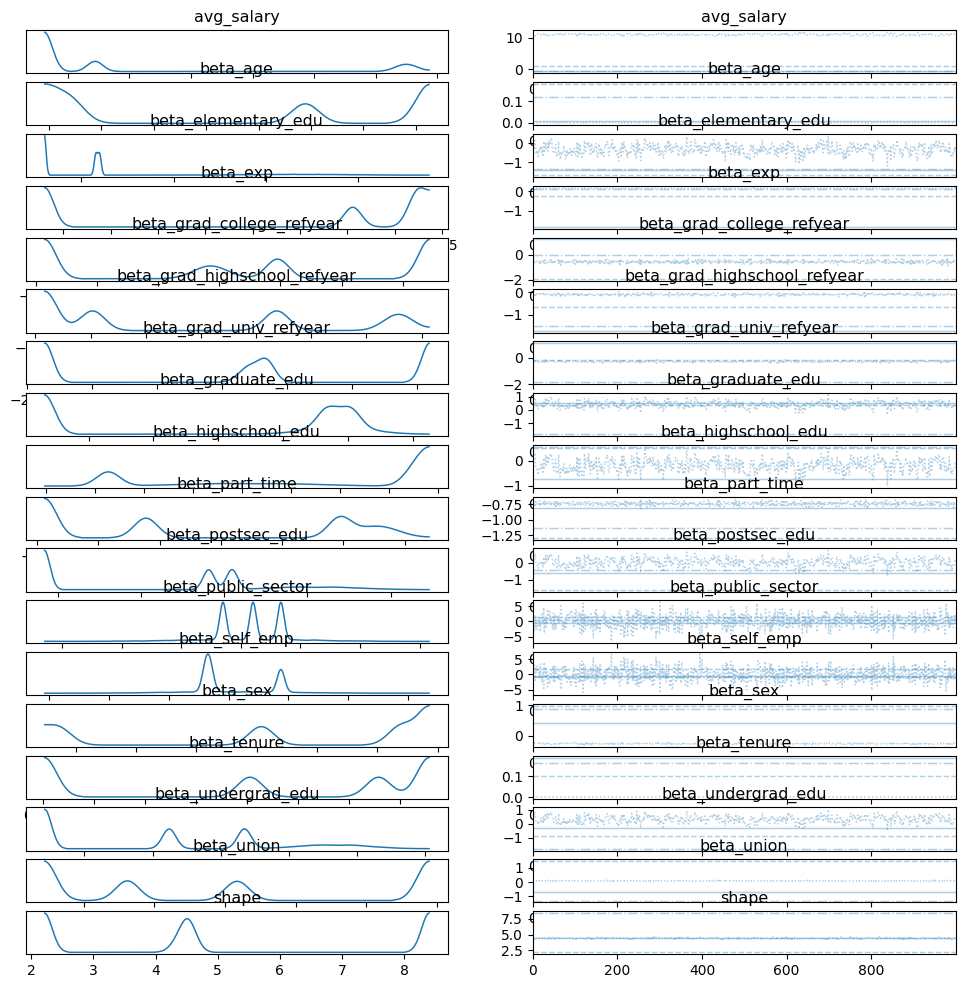

In [13]:
az.plot_trace(az.from_numpyro(mcmc), combined=True, figsize=(12, 12));

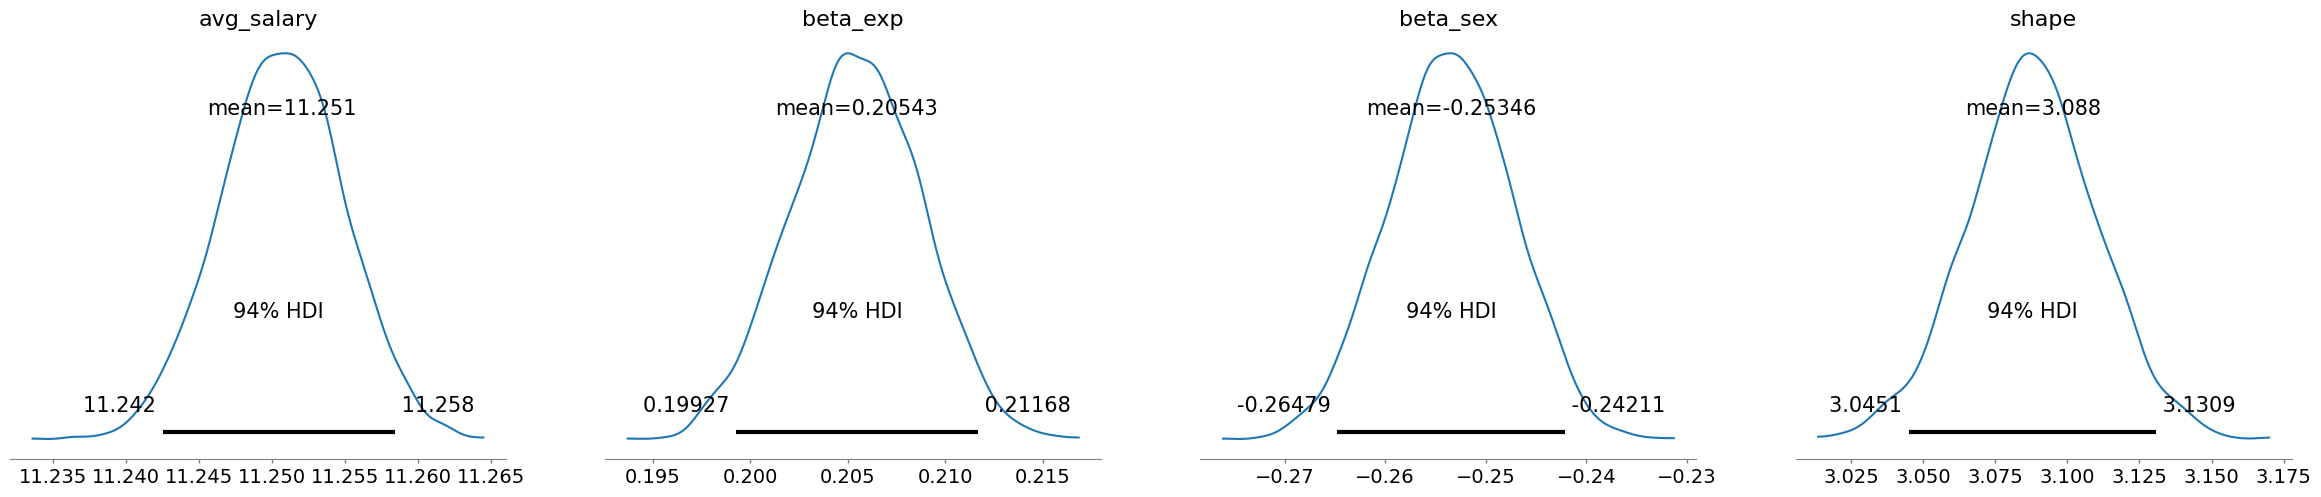

In [137]:
az.plot_posterior(az.from_numpyro(mcmc), round_to=5);

## Sequential sampling

In [22]:
def concat_samples(samples):
    for key in samples[0]:
        samples[0][key] = jnp.concatenate([samples[0][key], samples[1][key]], axis=1)
    return samples[0]

In [23]:
def create_inference_data(mcmc,
                          samples, 
                          divergences, 
                          loglikelihood, 
                          dimension_name, 
                          dimension,
                          target):
    trace = az.from_numpyro(mcmc)
    chains, draws = samples["avg_salary"].shape
    print(chains, draws)
    obs = target.shape[0]

    posterior_dataset = xr.Dataset(
        data_vars = { var: (["chain", "draw"], samples[var]) for var in samples.keys() },
        coords = { "chain": np.arange(chains), "draw": np.arange(draws) },
        attrs = trace.posterior.attrs,
    )
    loglike_dataset = xr.Dataset(
        data_vars=dict(log_likelihood=(["chain", "draw", "obs"], loglikelihood)),
        coords=dict(chain=np.arange(chains), draw=np.arange(draws), obs=np.arange(obs)),
        attrs=trace.log_likelihood.attrs
    )
    sample_stats = xr.Dataset(
        data_vars=dict(diverging=(["chain", "draw"], divergences)),
        coords=dict(chain=np.arange(chains),draw=np.arange(draws)),
        attrs=trace.sample_stats.attrs,
    )
    observed_data = xr.Dataset(
        data_vars=dict(salary=(["obs"], target)),
        coords=dict(obs=np.arange(obs)),
        attrs=trace.observed_data.attrs,
    )

    return az.InferenceData(posterior=posterior_dataset,
                 log_likelihood=loglike_dataset,
                 sample_stats=sample_stats,
                 observed_data=observed_data)

In [24]:
iterations = 10
samples = None
divergences = None
logll = None
rng_key = random.PRNGKey(0)
rng_key, rng_key_ = random.split(rng_key)
kernel = NUTS(hierarchical, target_accept_prob=0.98, dense_mass=True, max_tree_depth=12,init_strategy=init_to_median(num_samples=100))
mcmc = MCMC(kernel, num_warmup=200, num_samples=200, num_chains=4, chain_method="vectorized")
mcmc.run(rng_key, X, y)
samples = { key: jnp.array(value) for key, value in mcmc.get_samples(group_by_chain=True).items() }
divergences = jnp.array(mcmc.get_extra_fields(group_by_chain=True)["diverging"])
logll = jnp.array(log_likelihood(hierarchical, mcmc.get_samples(), X, y, batch_ndims=1)["salary_hat"].reshape(4, 200, -1))

samples = { key: jax.device_put(value, device=jax.devices("cpu")[0]) for key, value in samples.items() }
divergences = jax.device_put(divergences, jax.devices("cpu")[0])
logll = jax.device_put(logll, jax.devices("cpu")[0])
trace = create_inference_data(mcmc, samples, divergences, logll, "industry", ind, y)
max_rhat = az.summary(trace, round_to=5)["r_hat"].max()
print(f">>>>>>>>>>>>>>>> Warmup complete - max_rhat: {max_rhat} <<<<<<<<<<<<<<<<<<<<")

for it in range(iterations):
    mcmc.post_warmup_state = mcmc.last_state
    mcmc.run(mcmc.post_warmup_state.rng_key, X, y)
    samples = concat_samples([samples, mcmc.get_samples(group_by_chain=True)])
    divergences = jnp.concatenate([divergences, mcmc.get_extra_fields(group_by_chain=True)["diverging"]], axis=1)
    logll = jnp.concatenate([logll, log_likelihood(hierarchical, mcmc.get_samples(), X, y, batch_ndims=1)["salary_hat"].reshape(4,200,-1)], axis=1)
    trace = create_inference_data(mcmc, samples, divergences, logll, "industry", ind, y)
    max_rhat = az.summary(trace, round_to=5)["r_hat"].max()
    print(f">>>>>>>>>>>>>>>> Iteration {it+1}/{iterations} complete - max_rhat: {max_rhat} <<<<<<<<<<<<<<<<<<<<")
    # print(az.summary(az.from_numpyro(mcmc), round_to=5))
trace = create_inference_data(mcmc, samples, divergences, logll, "industry", ind, y)

sample: 100%|██████████| 400/400 [53:18<00:00,  8.00s/it]


4 200
>>>>>>>>>>>>>>>> Warmup complete - max_rhat: 2.81037 <<<<<<<<<<<<<<<<<<<<


sample: 100%|██████████| 200/200 [28:20<00:00,  8.50s/it]


4 400
>>>>>>>>>>>>>>>> Iteration 1/10 complete - max_rhat: 2.75571 <<<<<<<<<<<<<<<<<<<<


sample:  20%|█▉        | 39/200 [05:32<22:52,  8.53s/it]

In [18]:
trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [19]:
az.summary(trace, round_to=5)

mean       sd    hdi_3%   hdi_97%  \
avg_salary                    11.55726  0.01406  11.52962  11.58295   
beta_age                       0.02195  0.00332   0.01572   0.02829   
beta_elementary_edu           -0.75158  0.01812  -0.78586  -0.71857   
beta_exp                       0.13293  0.00333   0.12699   0.13949   
beta_grad_college_refyear     -0.63086  0.02343  -0.67411  -0.58629   
beta_grad_highschool_refyear  -0.13244  0.01006  -0.15205  -0.11467   
beta_grad_univ_refyear        -0.18123  0.01162  -0.20264  -0.15964   
beta_graduate_edu              0.06045  0.01577   0.03123   0.09108   
beta_highschool_edu           -0.58551  0.01443  -0.61307  -0.55866   
beta_part_time                -0.59900  0.00647  -0.61127  -0.58685   
beta_postsec_edu              -0.37617  0.01407  -0.40200  -0.34868   
beta_public_sector             0.02517  7.08414 -13.34204  13.06234   
beta_self_emp                  0.04673  7.08421 -13.03163  13.36919   
beta_sex                      -0.28597  0.00372  -0.29312  -0.27913   
beta_tenure                    0.11310  0.00222   0.10901   0.11740   
beta_undergrad_edu            -0.07161  0.01462  -0.09989  -0.04523   
beta_union                     0.08112  0.00421   0.07323   0.08904   
shape                          4.04969  0.01887   4.01345   4.08417   

                              mcse_mean  mcse_sd     ess_bulk    ess_tail  \
avg_salary                      0.00020  0.00014   5123.16967  5184.51797   
beta_age                        0.00003  0.00002  13221.16842  7531.04648   
beta_elementary_edu             0.00023  0.00017   5958.98457  5560.34585   
beta_exp                        0.00003  0.00002  12835.62278  7474.35714   
beta_grad_college_refyear       0.00036  0.00025   4296.18683  4736.18936   
beta_grad_highschool_refyear    0.00011  0.00008   8034.86746  6254.27748   
beta_grad_univ_refyear          0.00014  0.00010   6697.72712  5949.76727   
beta_graduate_edu               0.00021  0.00015   5485.13583  5182.35251   
beta_highschool_edu             0.00020  0.00014   5250.63899  5393.97027   
beta_part_time                  0.00006  0.00004  11191.86882  6607.11392   
beta_postsec_edu                0.00020  0.00014   5167.06549  5208.82350   
beta_public_sector              0.12503  0.08842   3216.05039  4038.46863   
beta_self_emp                   0.12503  0.08842   3216.15337  4038.46863   
beta_sex                        0.00003  0.00002  14205.97535  7144.93993   
beta_tenure                     0.00002  0.00001  11455.30363  6909.61692   
beta_undergrad_edu              0.00020  0.00014   5321.31529  5670.53107   
beta_union                      0.00004  0.00002  14352.53320  6848.70992   
shape                           0.00019  0.00014   9505.29634  6543.95334   

                                r_hat  
avg_salary                    1.00109  
beta_age                      1.00058  
beta_elementary_edu           1.00095  
beta_exp                      1.00047  
beta_grad_college_refyear     1.00024  
beta_grad_highschool_refyear  1.00077  
beta_grad_univ_refyear        1.00048  
beta_graduate_edu             1.00068  
beta_highschool_edu           1.00123  
beta_part_time                1.00014  
beta_postsec_edu              1.00157  
beta_public_sector            1.00025  
beta_self_emp                 1.00026  
beta_sex                      1.00061  
beta_tenure                   1.00065  
beta_undergrad_edu            1.00079  
beta_union                    1.00027  
shape                         1.00019

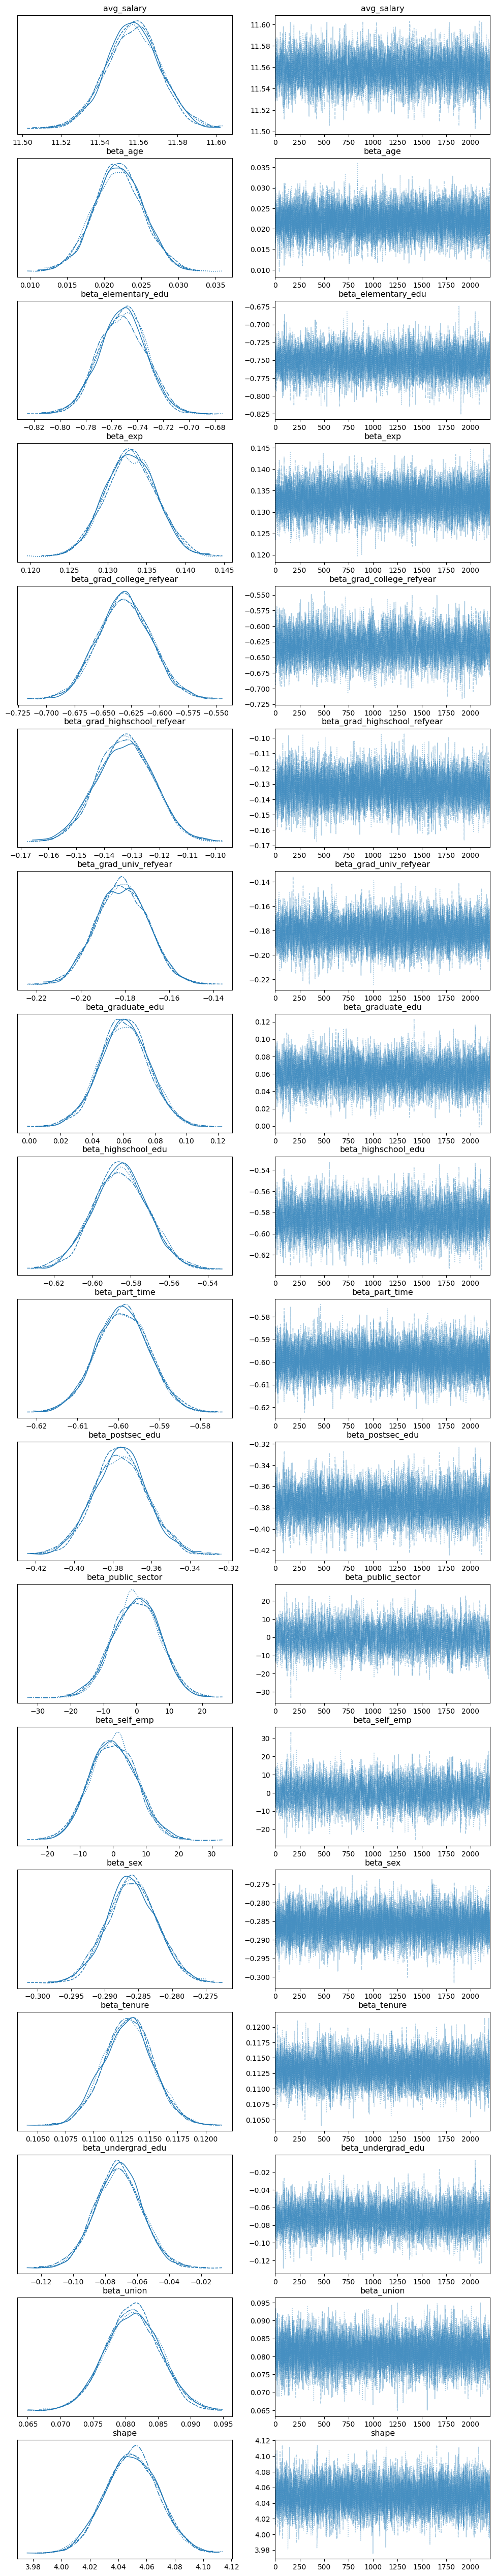

In [20]:
az.plot_trace(trace, combined=False, figsize=(12, 65));

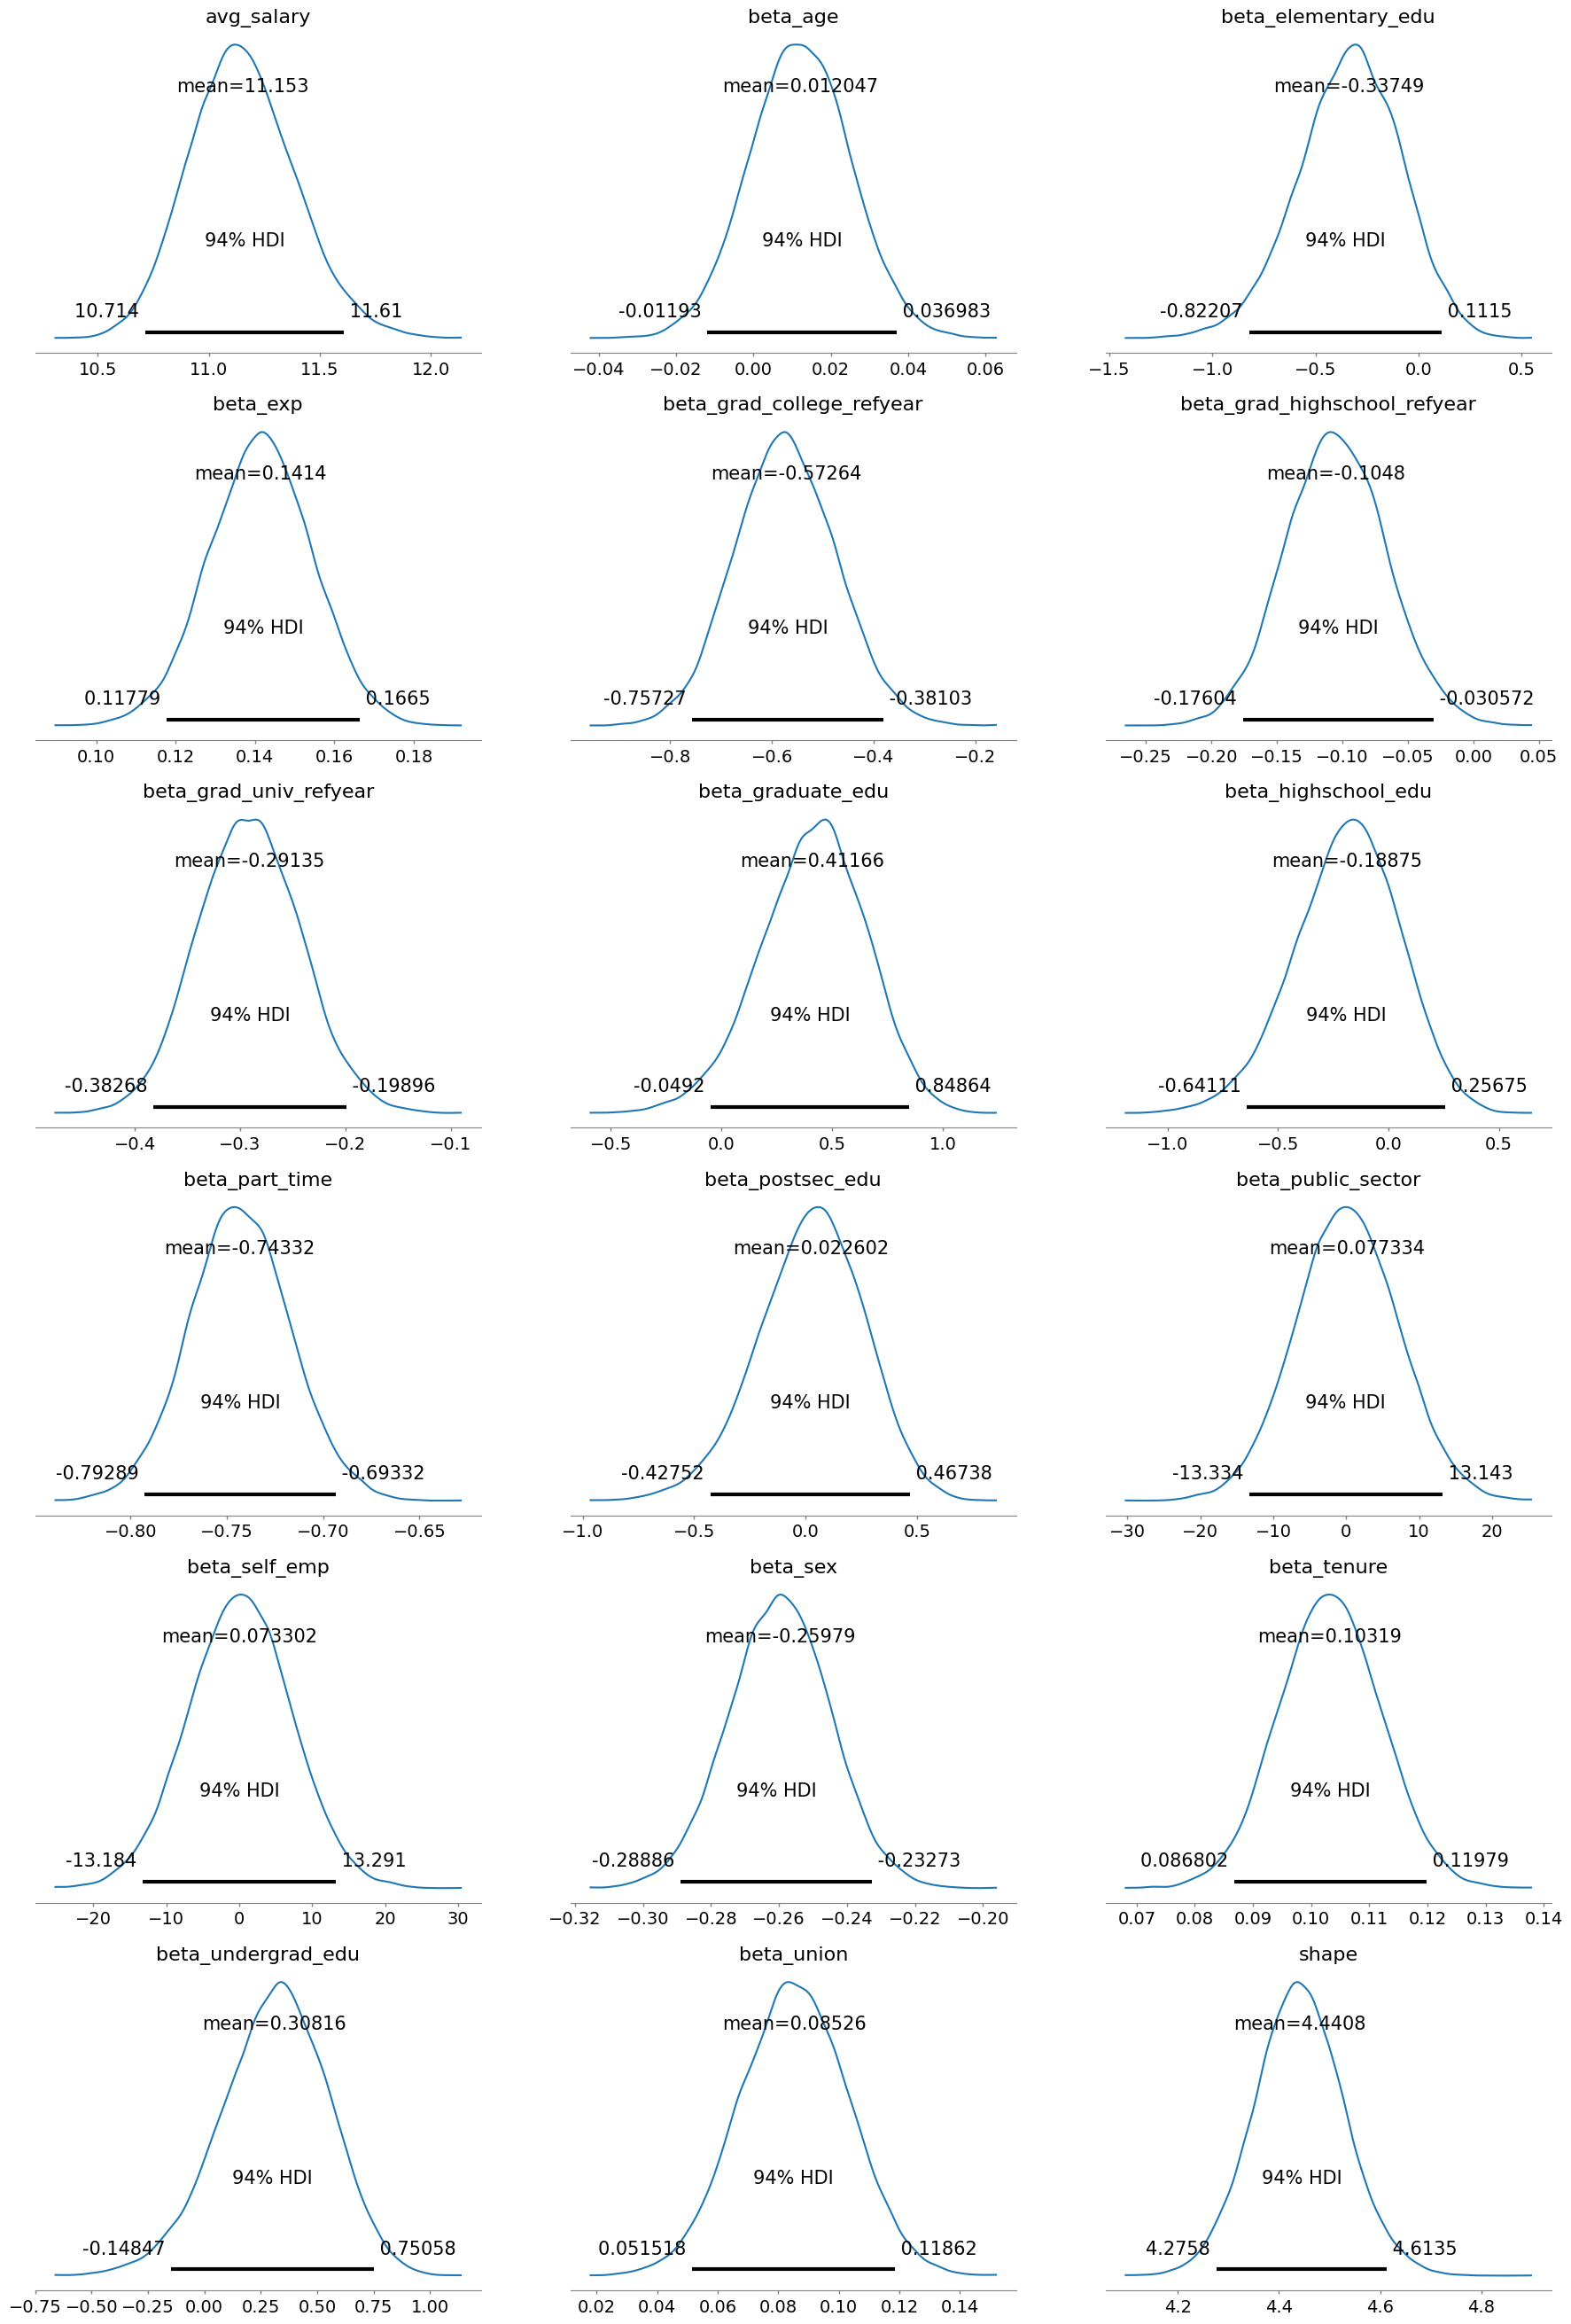

In [44]:
az.plot_posterior(trace, round_to=5);

In [58]:
log_likelihood(model, mcmc.get_samples(), X, y, batch_ndims=1)["salary_hat"].shape

(400, 4370)

In [60]:
y.shape

(4370,)